##Dataset Cleaning.

In [ ]:
!pip install tensorflow
!pip install imblearn
!pip install scikit-learn
!pip install transformers
#general purpose packages
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#data processing
import re, string
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras

#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#setting seed for reproducibility
seed=42

#setting style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.4 MB/s eta 0:00:00


<ipython-input-1-78af7bf8b323>:38: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

In [ ]:
#importing the test and train dataset
recipe_data_test = pd.read_excel('Recipe_Interactions_Test.xlsx')
recipe_data_train = pd.read_excel('Recipe_interactions_Train.xlsx')

In [ ]:
recipe_data_train.head()

,user_id,recipe_id,recipe_name,date,rating,sentiment,review
0,1230435,353262,black beans and rice,2009-04-08,5,Positive,"Great, easy and delicious - besides being hea..."
1,133174,353262,black beans and rice,2010-12-14,5,Positive,I am attracted to this recipe because of the b...
2,1804748,353262,black beans and rice,2011-01-23,4,Positive,I was attracted to this recipe because the spi...
3,382280,353262,black beans and rice,2010-02-23,5,Positive,This is a wonderful recipe that we will defini...
4,544202,353262,black beans and rice,2009-03-23,5,Positive,This recipe is awesome!!! I use brown Basma...


In [ ]:
recipe_data_train.tail()

,user_id,recipe_id,recipe_name,date,rating,sentiment,review
4995,865936,392620,zuppa di pesce castagna,2009-10-06,4,Positive,"I liked this soup a lot, especially considerin..."
4996,2747901,388574,zuppa toscana from olive garden,2013-03-22,3,Neutral,We were at Olive Garden a few days ago. My hus...
4997,993604,301890,zurie s pork tenderloin with yoghurt mustard ...,2011-06-21,4,Positive,"This is a nice, flavorful dish. The pork is t..."
4998,953275,381216,zuvers barbecue sauce,2009-07-15,3,Neutral,Chose this recipe because it was so quick and ...
4999,746803,424875,zwiebelbrotchen onion rolls,2010-05-21,4,Positive,This made a light and soft roll. But I only g...


In [ ]:
recipe_data_test.head()

,user_id,recipe_id,recipe_name,date,rating,sentiment,review
0,1803681343,283618,0 carb 0 cal gummy worms,2017-12-30,5,Positive,Great!
1,2000269452,283618,0 carb 0 cal gummy worms,2015-06-14,5,Positive,OMG!!! What a find! This worked perfectly! I w...
2,871801,283618,0 carb 0 cal gummy worms,2008-10-07,4,Positive,mmm
3,824257,283618,0 carb 0 cal gummy worms,2008-04-25,5,Positive,really good!!! The only thing i did different ...
4,1762248,480558,0 point ice cream only 1 ingredient,2012-09-09,5,Positive,"""Peel your bananas first..."" No kidding!"


In [ ]:
recipe_data_test.tail()

,user_id,recipe_id,recipe_name,date,rating,sentiment,review
2007,625696,277763,black beans and kielbasa with rice,2009-11-17,5,Positive,Perfect fall meal!! I only had 1/2 lb. of kie...
2008,583809,277763,black beans and kielbasa with rice,2009-11-02,5,Positive,easy and delicious. what more is there to say...
2009,191533,277763,black beans and kielbasa with rice,2008-08-26,5,Positive,Lots of flavor in this dish! I made cleanup ea...
2010,755285,277763,black beans and kielbasa with rice,2008-04-21,4,Positive,This was a great alternative to chili. I put ...
2011,352132,277763,black beans and kielbasa with rice,2008-01-21,5,Positive,Wow! My family loved this! I changed the rec...


In [ ]:
recipe_data_train.describe()

,user_id,recipe_id,rating
count,5.000000e+03,5000.00000,5000.000000
mean,1.604430e+08,367755.66040,4.479600
std,5.349856e+08,66709.32184,0.838644
min,1.535000e+03,275129.00000,1.000000
25%,2.124310e+05,307506.00000,4.000000
50%,4.535220e+05,359178.00000,5.000000
75%,1.072593e+06,416169.00000,5.000000
max,2.002362e+09,535724.00000,5.000000


In [ ]:
recipe_data_test.describe()

,user_id,recipe_id,rating
count,2.012000e+03,2012.000000,2012.000000
mean,3.325758e+08,371546.294235,4.575050
std,7.351910e+08,70498.464705,0.889093
min,1.535000e+03,275206.000000,1.000000
25%,2.460970e+05,315678.000000,4.000000
50%,6.151360e+05,359462.500000,5.000000
75%,1.726810e+06,418692.000000,5.000000
max,2.002372e+09,537485.000000,5.000000


In [ ]:
recipe_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      5000 non-null   int64         
 1   recipe_id    5000 non-null   int64         
 2   recipe_name  5000 non-null   object        
 3   date         5000 non-null   datetime64[ns]
 4   rating       5000 non-null   int64         
 5   sentiment    5000 non-null   object        
 6   review       5000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 273.6+ KB


In [ ]:
recipe_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      2012 non-null   int64         
 1   recipe_id    2012 non-null   int64         
 2   recipe_name  2012 non-null   object        
 3   date         2012 non-null   datetime64[ns]
 4   rating       2012 non-null   int64         
 5   sentiment    2012 non-null   object        
 6   review       2012 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 110.2+ KB


In [ ]:
recipe_data_train['sentiment'].value_counts()

Positive    4528
Neutral      294
Negative     178
Name: sentiment, dtype: int64

In [ ]:
recipe_data_test['sentiment'].value_counts()

Positive    1833
Negative      92
Neutral       87
Name: sentiment, dtype: int64

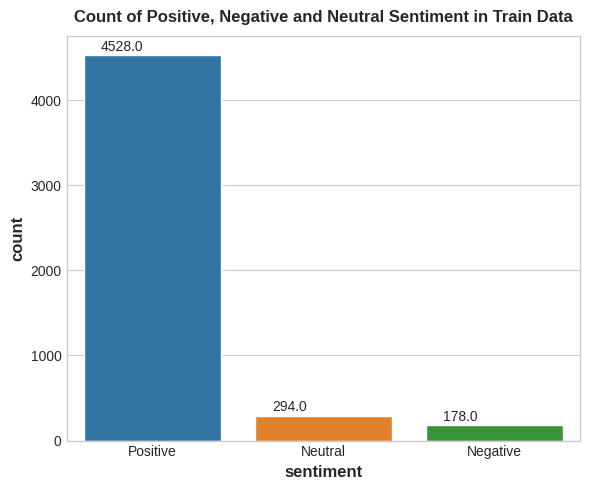

In [ ]:
%matplotlib inline
plt.figure(figsize = (6,5))
plt.title("Count of Positive, Negative and Neutral Sentiment in Train Data")
plot = sns.countplot(x = 'sentiment', data = recipe_data_train)
for p in plot.patches:
  plot.annotate(p.get_height(),(p.get_x()+0.1,p.get_height()+50))

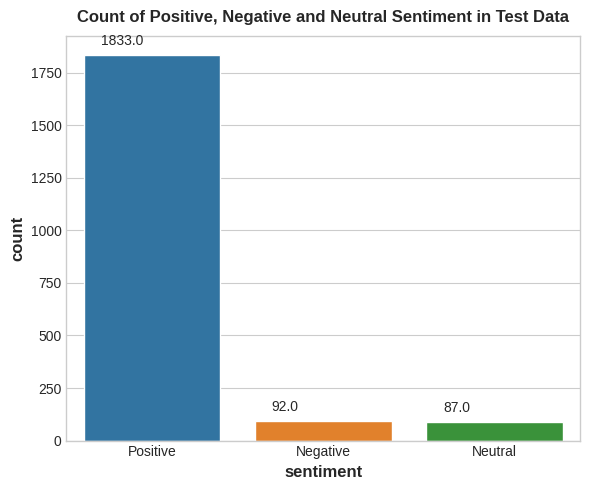

In [ ]:
%matplotlib inline
plt.figure(figsize = (6,5))
plt.title("Count of Positive, Negative and Neutral Sentiment in Test Data")
plot = sns.countplot(x = 'sentiment', data = recipe_data_test)
for p in plot.patches:
  plot.annotate(p.get_height(),(p.get_x()+0.1,p.get_height()+50))

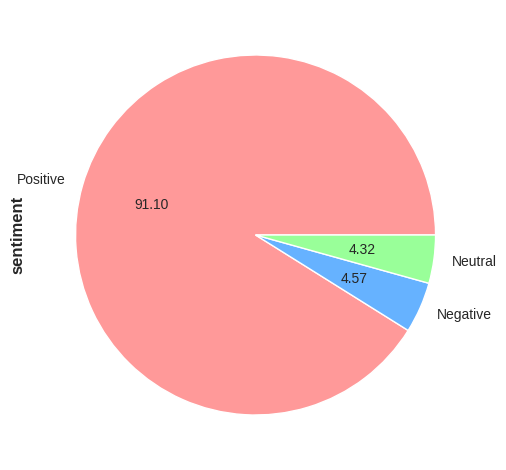

In [ ]:
custom_colors = ['#FF9999', '#66B2FF', '#99FF99']
recipe_data_test['sentiment'].value_counts().plot(kind='pie', autopct='%.2f', colors=custom_colors)
plt.show()

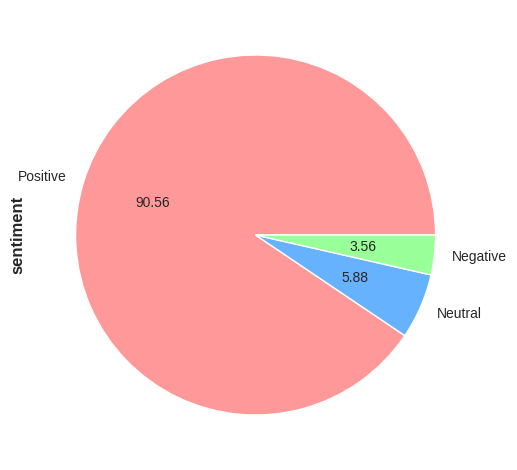

In [ ]:
custom_colors = ['#FF9999', '#66B2FF', '#99FF99']
recipe_data_train['sentiment'].value_counts().plot(kind='pie', autopct='%.2f', colors=custom_colors)
plt.show()

In [ ]:
data1 = recipe_data_test['recipe_name']
df1 = pd.DataFrame(data1)
dtype_counts = df1.dtypes.value_counts()
print(dtype_counts)
df1['recipe_name'] = df1['recipe_name'].astype(object)
# Verify the data types after conversion
print(df1.dtypes)

data2 = recipe_data_train['recipe_name']
df2 = pd.DataFrame(data2)
dtype_counts = df2.dtypes.value_counts()
print(dtype_counts)
df2['recipe_name'] = df2['recipe_name'].astype(object)
# Verify the data types after conversion
print(df2.dtypes)

object    1
dtype: int64
recipe_name    object
dtype: object
object    1
dtype: int64
recipe_name    object
dtype: object


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   recipe_name  2012 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [ ]:
df1['recipe_name'].head()

0              0 carb   0 cal gummy worms
1              0 carb   0 cal gummy worms
2              0 carb   0 cal gummy worms
3              0 carb   0 cal gummy worms
4    0 point ice cream  only 1 ingredient
Name: recipe_name, dtype: object

In [ ]:
#import re
def custom_replace(cell_value):
    cell_value = re.sub(r'\d+', '', cell_value)  # Replacing all digits with blank
    return cell_value

# Applying custom function to the desired column
df1['recipe_name'] = df1['recipe_name'].apply(custom_replace)
df1['recipe_name'].head()
# Applying custom function to the desired column
df2['recipe_name'] = df2['recipe_name'].apply(custom_replace)
df2['recipe_name'].head()

0    black beans and rice
1    black beans and rice
2    black beans and rice
3    black beans and rice
4    black beans and rice
Name: recipe_name, dtype: object

In [ ]:
df1['recipe_name'].head()

0               carb    cal gummy worms
1               carb    cal gummy worms
2               carb    cal gummy worms
3               carb    cal gummy worms
4     point ice cream  only  ingredient
Name: recipe_name, dtype: object

In [ ]:
replacement_dict = {
    "carb    cal gummy worms": "gummy worms",
    "point ice cream  only  ingredient": "point ice cream",
    "quart crock pot rice pudding": "quart rice pudding",
    "point soup  crock pot": "crock pot soup",
    "brownies in the world    best ever": "brownies",
    "cup of coffee pork roast": "coffee and pork roast",
    "calorie chocolate miracle noodle cookies": "chocolate noodle cookies",
    " point soup   ww": "point soup",
    " point plus   hg s veggied up veggie dip": "veggie dip",
    " point plus   roasted asparagus with lemon and chives": "roasted asparagus",
    " pot   item   sausage suprise": "sausage",
    " pot curried rotini with currants  peas and red peppers": "curried rotini",
    " turkey meatloaf  with sun dried tomatoes and feta": "turkey meatloaf"
    # to be Added more key-value pairs as needed
}

# Performing replacements on the desired column on test dataset
df1['recipe_name'] = df1['recipe_name'].replace(replacement_dict, regex=True)
df1['recipe_name'] = df1['recipe_name'].str.replace(r'^\s+', '', regex=True) #removing spaces before first string
df1['recipe_name'] = df1['recipe_name'].str.replace(r'\s{2,}', ' ', regex=True) #removing 2 or more spaces between or after any string
# Performing replacements on the desired column on train dataset
df2['recipe_name'] = df2['recipe_name'].replace(replacement_dict, regex=True)
df2['recipe_name'] = df2['recipe_name'].str.replace(r'^\s+', '', regex=True) #removing spaces before first string
df2['recipe_name'] = df2['recipe_name'].str.replace(r'\s{2,}', ' ', regex=True) #removing 2 or more spaces between or after any string
df2['recipe_name'].head(100)


0                                  black beans and rice
1                                  black beans and rice
2                                  black beans and rice
3                                  black beans and rice
4                                  black beans and rice
                            ...                        
95    black eyed peas for those who usually don t li...
96                              black eyed peas and ham
97                    black eyed peas and ham casserole
98                    black eyed peas and ham casserole
99                 black eyed peas and hot sausage stew
Name: recipe_name, Length: 100, dtype: object

In [ ]:
# Droping the original 'Column_Name' from the test DataFrame
recipe_data_test.drop(columns=['recipe_name'], inplace=True)
# Renaming the 'Applied_Column' to 'Column_Name'
recipe_data_test = pd.concat([recipe_data_test, df1['recipe_name']], axis=1)
# Reordering the columns in the DataFrame
new_order = ['user_id', 'recipe_id', 'recipe_name', 'date', 'rating','sentiment','review']
recipe_data_test = recipe_data_test.reindex(columns=new_order)
recipe_data_test.head()

,user_id,recipe_id,recipe_name,date,rating,sentiment,review
0,1803681343,283618,gummy worms,2017-12-30,5,Positive,Great!
1,2000269452,283618,gummy worms,2015-06-14,5,Positive,OMG!!! What a find! This worked perfectly! I w...
2,871801,283618,gummy worms,2008-10-07,4,Positive,mmm
3,824257,283618,gummy worms,2008-04-25,5,Positive,really good!!! The only thing i did different ...
4,1762248,480558,point ice cream,2012-09-09,5,Positive,"""Peel your bananas first..."" No kidding!"


In [ ]:
# Droping the original 'Column_Name' from the train DataFrame
recipe_data_train.drop(columns=['recipe_name'], inplace=True)
# Renaming the 'Applied_Column' to 'Column_Name'
recipe_data_train = pd.concat([recipe_data_train, df2['recipe_name']], axis=1)
# Reordering the columns in the DataFrame
new_order = ['user_id', 'recipe_id', 'recipe_name', 'date', 'rating','sentiment','review']
recipe_data_train = recipe_data_train.reindex(columns=new_order)
recipe_data_train.head()

,user_id,recipe_id,recipe_name,date,rating,sentiment,review
0,1230435,353262,black beans and rice,2009-04-08,5,Positive,"Great, easy and delicious - besides being hea..."
1,133174,353262,black beans and rice,2010-12-14,5,Positive,I am attracted to this recipe because of the b...
2,1804748,353262,black beans and rice,2011-01-23,4,Positive,I was attracted to this recipe because the spi...
3,382280,353262,black beans and rice,2010-02-23,5,Positive,This is a wonderful recipe that we will defini...
4,544202,353262,black beans and rice,2009-03-23,5,Positive,This recipe is awesome!!! I use brown Basma...


In [ ]:
recipe_data_test.to_csv('Recipe_interactions_test.csv', index=False)

In [ ]:
recipe_data_train.to_csv('Recipe_interactions_train.csv', index=False)

In [ ]:
df =  pd.read_csv('Recipe_interactions_train.csv',encoding='ISO-8859-1')
df_test = pd.read_csv('Recipe_interactions_test.csv',encoding='ISO-8859-1')

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      5000 non-null   int64 
 1   recipe_id    5000 non-null   int64 
 2   recipe_name  5000 non-null   object
 3   date         5000 non-null   object
 4   rating       5000 non-null   int64 
 5   sentiment    5000 non-null   object
 6   review       5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [ ]:
df.drop_duplicates(subset='review',inplace=True)

In [ ]:
df_test.drop_duplicates(subset='review',inplace=True)

In [ ]:
df.head()

,user_id,recipe_id,recipe_name,date,rating,sentiment,review
0,1230435,353262,black beans and rice,2009-04-08,5,Positive,"Great, easy and delicious - besides being hea..."
1,133174,353262,black beans and rice,2010-12-14,5,Positive,I am attracted to this recipe because of the b...
2,1804748,353262,black beans and rice,2011-01-23,4,Positive,I was attracted to this recipe because the spi...
3,382280,353262,black beans and rice,2010-02-23,5,Positive,This is a wonderful recipe that we will defini...
4,544202,353262,black beans and rice,2009-03-23,5,Positive,This recipe is awesome!!! I use brown Basma...


In [ ]:
reviews_per_recipe = df['recipe_name'].value_counts().reset_index(name='counts')
reviews_per_recipe = reviews_per_recipe[reviews_per_recipe['counts'] > 50].sort_values(by='counts')

In [ ]:
# plt.figure(figsize=(6,6))
# ax = sns.barplot(x='index', y='counts', data=reviews_per_recipe,edgecolor = 'black',ci=False, palette='Spectral')
# plt.title('Number of Reviews for each Recipe')
# plt.xticks(rotation=70)
# plt.yticks([])
# ax.bar_label(ax.containers[0])
# plt.ylabel('count')
# plt.xlabel('')
# plt.show()

##Deep Cleaning

In [ ]:
df = df[['review','sentiment']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4996 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     4996 non-null   object
 1   sentiment  4996 non-null   object
dtypes: object(2)
memory usage: 117.1+ KB


In [ ]:
df_test = df_test[['review','sentiment']]

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 2011
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2012 non-null   object
 1   sentiment  2012 non-null   object
dtypes: object(2)
memory usage: 47.2+ KB


In [ ]:
#Removeing punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text
#Filtering special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [ ]:
texts_new = []
for t in df.review:
    texts_new.append(remove_mult_spaces(filter_chars(strip_all_entities(t))))

In [ ]:
texts_new_test = []
for t in df_test.review:
    texts_new_test.append(remove_mult_spaces(filter_chars(strip_all_entities(t))))

In [ ]:
df['text_clean'] = texts_new
df_test['text_clean'] = texts_new_test

In [ ]:
df['text_clean'].head()

0    great easy and delicious besides being healthy...
1    i am attracted to this recipe because of the b...
2    i was attracted to this recipe because the spi...
3    this is a wonderful recipe that we will defini...
4    this recipe is awesome i use brown basmati ric...
Name: text_clean, dtype: object

In [ ]:
df_test['text_clean'].head()

0                                                great
1    omg what a find this worked perfectly i went h...
2                                                  mmm
3    really good the only thing i did different was...
4                   peel your bananas first no kidding
Name: text_clean, dtype: object

In [ ]:
df['text_clean'][1:8].values

array(['i am attracted to this recipe because of the brown rice and fresh tomatoes it did not disappoint i loved the combination of spices this is a recipe i will safe to make again thank you for sharing',
       'i was attracted to this recipe because the spices looked as though they would add great flavor i adapted it to suit our tastes and used white rice added 14 cup white wine to the rice after heating it in the oil so it would be more flavorful i used frozen italian tomatoes from our garden and chopped them before adding i added prepackaged and precooked turkeychicken with sun dried tomato and mozzarella sausage cut on the diagonal after everything was done just to heat the sausage it was yummy we all love this recipe and will make it often of course with our tweaks and whatever else we have on hand i would have given 5 stars but i really think the wine added more flavor oh and i was light on the hot stuff our granddaughter cannot tolerate it and neither can i it seems that a lot

In [ ]:
#Moreover, we will also create a column to host the lenght of the cleaned text,
 #to check if by cleaning the text we removed too much text or almost entirely
 #the review!
text_len = []
for text in df.text_clean:
    review_len = len(text.split())
    text_len.append(review_len)


In [ ]:
df['text_len'] = text_len

In [ ]:
text_len_test = []
for text in df_test.text_clean:
    review_len = len(text.split())
    text_len_test.append(review_len)

In [ ]:
df_test['text_len'] = text_len_test

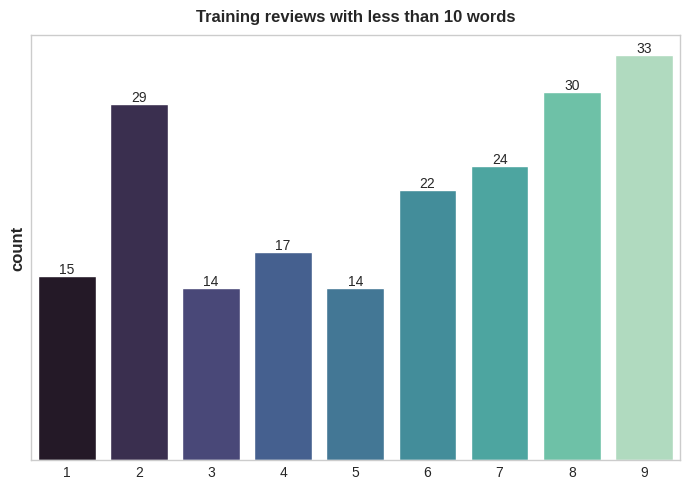

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Training reviews with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

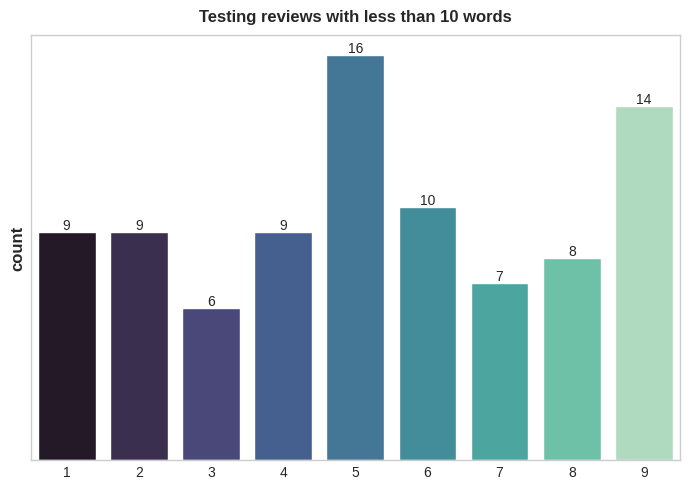

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df_test[df_test['text_len']<10], palette='mako')
plt.title('Testing reviews with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

As we can see, there are lots of cleaned reviews with 0 words: this is due to the cleaning performed before. This means that some reviews contained only mentions, hashtags and links, which have been removed. We will drop these empty reviews and also those with less than 5 words.

In [ ]:
print(f" DF SHAPE: {df.shape}")
print(f" DF TEST SHAPE: {df_test.shape}")

 DF SHAPE: (4996, 4)
 DF TEST SHAPE: (2012, 4)


In [ ]:
df = df[df['text_len'] > 4]

In [ ]:
df_test = df_test[df_test['text_len'] > 4]

In [ ]:
print(f" DF SHAPE: {df.shape}")
print(f" DF TEST SHAPE: {df_test.shape}")

 DF SHAPE: (4921, 4)
 DF TEST SHAPE: (1979, 4)


##Training data deeper cleaning

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
token_lens = []

for txt in df['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 512


Let's check the long tokenized sentences (with more than 500 tokens ):

In [ ]:
token_lens = []

for i,txt in enumerate(df['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))
    if len(tokens)>500:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 2703, TEXT: i made a double recipe for a potluck dinner the cooking time were longer due to the increased quantity no doubt the result was rich creamy and delicious it was best when it was first completed just out of the oven by the time i got it to the potluck it was not as creamy a more liquid was absorbed it still tasted very good even when lukewarm from sitting out but it was at it039s prime hot when the butter was all melted ltbrgtltbrgthere are the changes i made ltbrgtltbrgti doubled the recipe this made it take longer to prepare due to cooking times ltbrgtltbrgti used onion that were diced already from the grocery store they were a small dice but i would have diced them smaller if i had diced them myself still i don039t think it made a difference ltbrgtltbrgti boiled some chicken leg in a little bit more water than the recipe called for and added chicken boullion powder in that but i made it a little weaker than you039d normally make it because the chicken would add flav

These are in english so need not to be dropped

In [ ]:
df['token_lens'] = token_lens
df = df.sort_values(by='token_lens', ascending=False)
df.head(20)

,review,sentiment,text_clean,text_len,token_lens
2743,I made a double recipe for a potluck dinner. T...,Positive,i made a double recipe for a potluck dinner th...,803,512
3203,"This bread was tender, soft & had a hint of sw...",Positive,this bread was tender soft had a hint of sweet...,451,483
3921,There&#039;s a tendency to skip over recipes t...,Positive,there039s a tendency to skip over recipes that...,350,441
1345,I am rating this on flavour since I had a few ...,Positive,i am rating this on flavour since i had a few ...,332,425
4392,I made this cake with a few substitutes.\n\n1)...,Positive,i made this cake with a few substitutes 1 i di...,360,410
3871,Please read all of the review. This was made w...,Positive,please read all of the review this was made wi...,351,399
2922,"I&#039;m not crazy about Brazil Nuts, so I had...",Positive,i039m not crazy about brazil nuts so i had to ...,310,376
2906,Made for ZWT-9 &amp; a fellow Goddess - I had ...,Positive,made for zwt9 amp a fellow goddess i had alway...,275,343
2570,I found this recipe at the Pioneer Woman websi...,Positive,i found this recipe at the pioneer woman websi...,299,335
2958,This was very close to the pao de queyo I had ...,Positive,this was very close to the pao de queyo i had ...,282,335


In [ ]:
#The dataset looks more clean now. We will shuffle it and reset the index.
df = df.sample(frac=1).reset_index(drop=True)

##Test data deeper cleaning

In [ ]:
token_lens_test = []

for txt in df_test['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens_test.append(len(tokens))

max_len=np.max(token_lens_test)

In [ ]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 488


In [ ]:
token_lens_test = []

for i,txt in enumerate(df_test['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens_test.append(len(tokens))
    if len(tokens)>500:
        print(f"INDEX: {i}, TEXT: {txt}")

In [ ]:
df_test['token_lens'] = token_lens_test

In [ ]:
df_test = df_test.sort_values(by='token_lens', ascending=False)
df_test.head(10)

,review,sentiment,text_clean,text_len,token_lens
1992,Fantastic veggie burgers! I&#039;ll eat meat-b...,Positive,fantastic veggie burgers i039ll eat meatbased ...,390,488
930,If this recipe does&#039;nt work for you then ...,Positive,if this recipe does039nt work for you then you...,358,413
928,"Okay, the recipe is very vague on the directio...",Neutral,okay the recipe is very vague on the direction...,309,377
1316,OMG! So glad I found this recipe; actually I ...,Positive,omg so glad i found this recipe actually i fou...,317,356
1037,I made a double batch because I had 1 cup left...,Positive,i made a double batch because i had 1 cup left...,212,330
674,The 3 2 1 Microwave Cake really works!<br/>I l...,Positive,the 3 2 1 microwave cake really worksbri love ...,296,316
1096,Plain buttermilk pancakes are my favorite food...,Positive,plain buttermilk pancakes are my favorite food...,247,310
1192,Hi Chef in UK\n\nKudos to you for posting this...,Positive,hi chef in uk kudos to you for posting this re...,278,307
1616,this recipe is great i my whole family really ...,Positive,this recipe is great i my whole family really ...,289,302
203,This is my favorite whole wheat bread recipe f...,Positive,this is my favorite whole wheat bread recipe f...,264,300


In [ ]:
df_test = df_test.sample(frac=1).reset_index(drop=True)

Creting seperate train and test csv for Hybrid models

In [ ]:
df.to_csv('forhybrid_train.csv', index=False)

In [ ]:
df_test.to_csv('forhybrid_test.csv', index=False)

##Sentiment column analysis

In [ ]:
df['sentiment'].value_counts()

Positive    4452
Neutral      293
Negative     176
Name: sentiment, dtype: int64

In [ ]:
df['sentiment'] = df['sentiment'].map({'Negative':0,'Neutral':2,'Positive':4})

In [ ]:
df_test['sentiment'] = df_test['sentiment'].map({'Negative':0,'Neutral':2,'Positive':4})

In [ ]:
df_test['sentiment'].value_counts()

4    1801
0      91
2      87
Name: sentiment, dtype: int64

##Class Balancing by RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['text_clean']).reshape(-1, 1), np.array(df['sentiment']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text_clean', 'sentiment']);

In [ ]:
train_os['sentiment'].value_counts()

2    4452
4    4452
0    4452
Name: sentiment, dtype: int64

##Train - Validation - Test split

In [ ]:
X = train_os['text_clean'].values
y = train_os['sentiment'].values

A validation set will be extracted from the training set to monitor the validation accuracy, and so prevent overfitting.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

In [ ]:
X_test = df_test['text_clean'].values
y_test = df_test['sentiment'].values

##One hot encoding

In [ ]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [ ]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [ ]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 12020
VALIDATION DATA: 1336
TESTING DATA: 1979


##Baseline model: CNN

In [ ]:
#Building deep learn model
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
max_words=10000
wvtokenizer=Tokenizer(max_words)
wvtokenizer.fit_on_texts(X_train)
sequence_train=wvtokenizer.texts_to_sequences(X_train)
sequence_test=wvtokenizer.texts_to_sequences(X_test)

In [ ]:
word2vec=wvtokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 11005 number of independent tokens


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 200
data_train=pad_sequences(sequence_train, maxlen=maxlen, dtype='int32')
data_train.shape

(12020, 200)

In [ ]:
#T = data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=maxlen, dtype='int32')
data_test.shape

(1979, 200)

In [ ]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding, Concatenate
from tensorflow.keras.models import Model

In [ ]:
def create_CNN_model(maxlen):
  D=20
  T = maxlen
  i=Input((T,))
  x=Embedding(V+1,D)(i)
  x=Conv1D(32,3,activation='relu')(x)
  x=MaxPooling1D(3)(x)
  x=Conv1D(64,3,activation='relu')(x)
  x=MaxPooling1D(3)(x)
  x=Conv1D(128,3,activation='relu')(x)
  x=GlobalMaxPooling1D()(x)
  x=Dense(5,activation='softmax')(x)
  cnn_model = Model(i,x)
  return cnn_model

In [ ]:
cnn_model = create_CNN_model(maxlen = 200)
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 20)           220120    
                                                                 
 conv1d (Conv1D)             (None, 198, 32)           1952      
                                                                 
 max_pooling1d (MaxPooling1  (None, 66, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 64, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 21, 64)            0         
 g1D)                                                        

In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
cnn_senti = cnn_model.fit(data_train,y_train_le,validation_data = (data_test,y_test_le),epochs=5,batch_size=100)

Epoch 1/5
121/121 [==============================] - 31s 158ms/step - loss: 1.0307 - accuracy: 0.4792 - val_loss: 0.7197 - val_accuracy: 0.7443
Epoch 2/5
121/121 [==============================] - 12s 97ms/step - loss: 0.2790 - accuracy: 0.9032 - val_loss: 0.5292 - val_accuracy: 0.8782
Epoch 3/5
121/121 [==============================] - 8s 69ms/step - loss: 0.0377 - accuracy: 0.9916 - val_loss: 0.6782 - val_accuracy: 0.8929
Epoch 4/5
121/121 [==============================] - 5s 45ms/step - loss: 0.0099 - accuracy: 0.9984 - val_loss: 0.7503 - val_accuracy: 0.8853
Epoch 5/5
121/121 [==============================] - 4s 34ms/step - loss: 0.0045 - accuracy: 0.9994 - val_loss: 0.8071 - val_accuracy: 0.8828


In [ ]:
y_pred=cnn_model.predict(data_test)
y_pred

62/62 [==============================] - 0s 3ms/step


array([[9.9838162e-03, 6.7856169e-22, 2.2654638e-05, 1.0913053e-22,
        9.8999351e-01],
       [2.1650054e-05, 4.0866776e-12, 2.4456027e-04, 1.3835650e-12,
        9.9973375e-01],
       [2.3590322e-03, 7.7544219e-22, 1.1163778e-08, 6.5695263e-23,
        9.9764097e-01],
       ...,
       [1.0122218e-07, 6.9416117e-26, 9.8656492e-06, 1.5468458e-26,
        9.9998999e-01],
       [5.8784286e-07, 1.6496863e-26, 9.2362464e-09, 1.3728539e-27,
        9.9999940e-01],
       [7.2067610e-07, 9.5903067e-24, 3.4629464e-02, 6.4473034e-24,
        9.6536982e-01]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([4, 4, 4, ..., 4, 4, 4])

Text(9.444444444444448, 0.5, 'y_pred')

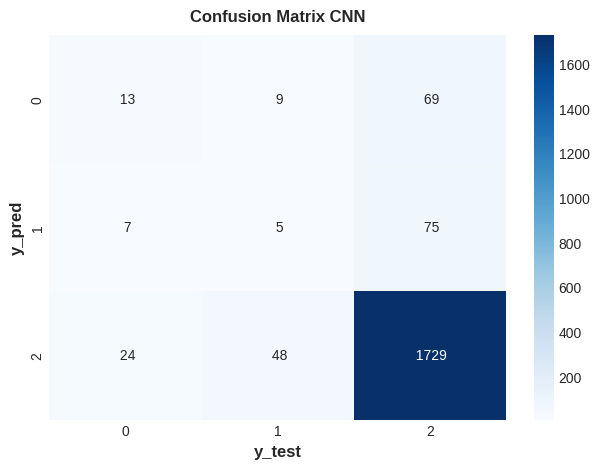

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test_le,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix CNN')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [ ]:
print('\tClassification Report for CNN:\n\n',
      classification_report(y_test_le,y_pred,  target_names=
       ['Negative', 'Neutral', 'Positive']))

	Classification Report for CNN:

               precision    recall  f1-score   support

    Negative       0.30      0.14      0.19        91
     Neutral       0.08      0.06      0.07        87
    Positive       0.92      0.96      0.94      1801

    accuracy                           0.88      1979
   macro avg       0.43      0.39      0.40      1979
weighted avg       0.86      0.88      0.87      1979



In [ ]:
# import matplotlib.pyplot as plt

# # Replace the values with the actual values from your classification report
# precision = [0.08, 0.12, 0.95]
# recall = [0.20, 0.01, 0.94]
# f1_score = [0.11, 0.02, 0.95]
# categories = ['Negative', 'Neutral', 'Positive']

# # Set up the bar positions
# x = range(len(categories))
# # Create subplots
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 10))

# # Plot precision
# ax1.bar(x, precision, color='b', align='center')
# ax1.set_title('Precision')
# ax1.set_xticks(x)
# ax1.set_xticklabels(categories)

# # Plot recall
# ax2.bar(x, recall, color='g', align='center')
# ax2.set_title('Recall')
# ax2.set_xticks(x)
# ax2.set_xticklabels(categories)

# # Plot F1-score
# ax3.bar(x, f1_score, color='r', align='center')
# ax3.set_title('F1-Score')
# ax3.set_xticks(x)
# ax3.set_xticklabels(categories)

# # Adjust layout
# plt.tight_layout()

# # Show the plot
# plt.show()

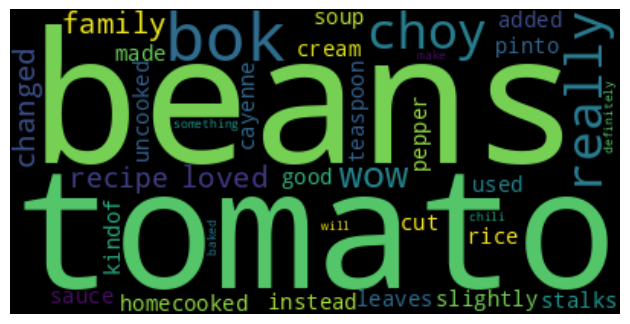

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cnn_accuracy = accuracy_score(y_test_le, y_pred)
print("CNN Model Overall Accuracy:", cnn_accuracy)

CNN Model Overall Accuracy: 0.8827690752905508


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


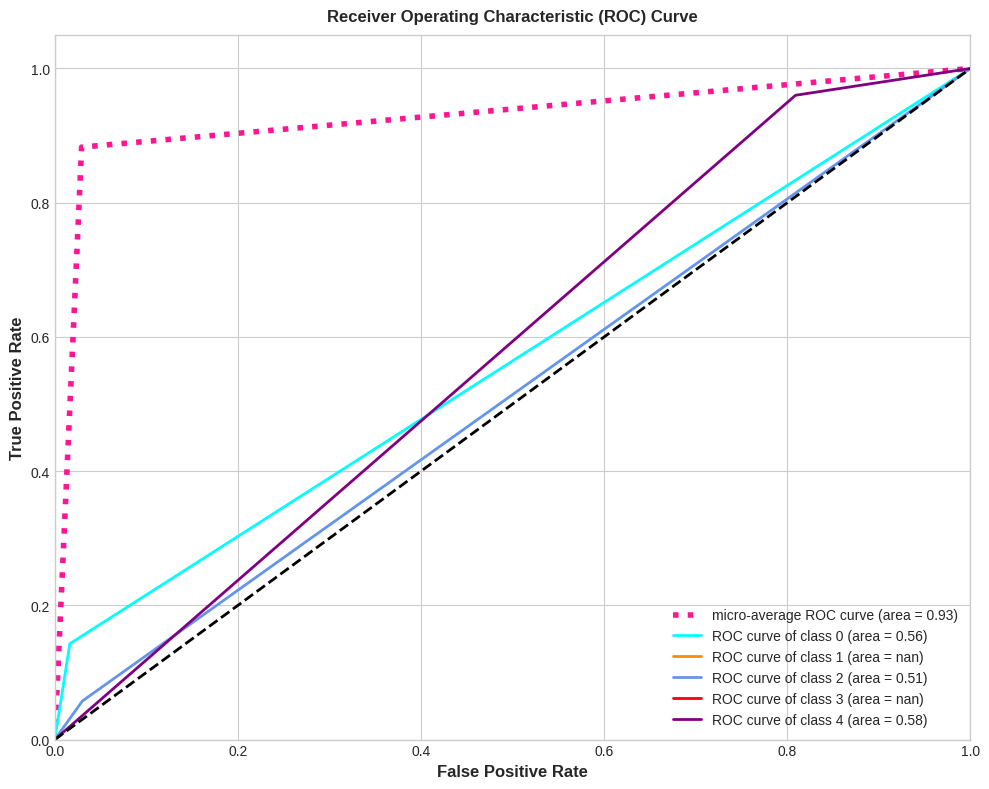

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
n_classes = 5  # Number of classes
y_test_bin = label_binarize(y_test_le, classes=range(n_classes))
y_pred_bin = label_binarize(y_pred, classes=range(n_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

# Plot ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##BERT Sentiment Analysis

<ipython-input-100-f553025193fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


Text(0.5, 0, 'Token count')

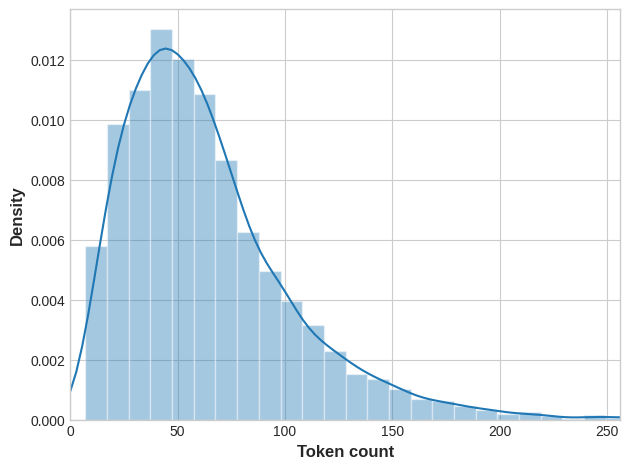

In [ ]:
# plot the distribution of review lengths
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

In [ ]:
MAX_LEN=200

In [ ]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            pad_to_max_length=True,
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.asarray(input_ids),np.asarray(attention_masks)

Then, we apply the tokenizer function to the train, validation and test sets.

In [ ]:
from transformers import BertTokenizer
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import numpy as np

In [ ]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

# Convert to int32
train_input_ids = train_input_ids.astype('int32')
train_attention_masks = train_attention_masks.astype('int32')
val_input_ids = val_input_ids.astype('int32')
val_attention_masks = val_attention_masks.astype('int32')
test_input_ids = test_input_ids.astype('int32')
test_attention_masks = test_attention_masks.astype('int32')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


##BERT modeling

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Then, we create a custom function to host the pre trained BERT model, and attach to it a 3 neurons output layer, necessary to perform the classification of the 3 different classes of the dataset (the 3 emotions).

In [ ]:
def create_BERT_model(bert_model, max_len=MAX_LEN):

    ##params###
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

    Bmodel = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    Bmodel.compile(opt, loss=loss, metrics=accuracy)


    return Bmodel

In [ ]:
Bmodel = create_BERT_model(bert_model, MAX_LEN)
Bmodel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_2[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_3[0][0]']             
                             hidden_state=(None, 200, 7                                           
                             68),                                                           

Finally we can start fine tuning the BERT transformer !

In [ ]:
history_bert = Bmodel.fit([train_input_ids,train_attention_masks], y_train,
                          validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=5, batch_size=32)

Epoch 1/5
376/376 [==============================] - 77s 160ms/step - loss: 0.3707 - categorical_accuracy: 0.8451 - val_loss: 0.0803 - val_categorical_accuracy: 0.9775
Epoch 2/5
376/376 [==============================] - 57s 151ms/step - loss: 0.0628 - categorical_accuracy: 0.9813 - val_loss: 0.0255 - val_categorical_accuracy: 0.9933
Epoch 3/5
376/376 [==============================] - 57s 152ms/step - loss: 0.0255 - categorical_accuracy: 0.9918 - val_loss: 0.0194 - val_categorical_accuracy: 0.9933
Epoch 4/5
376/376 [==============================] - 57s 152ms/step - loss: 0.0109 - categorical_accuracy: 0.9972 - val_loss: 0.0125 - val_categorical_accuracy: 0.9963
Epoch 5/5
376/376 [==============================] - 57s 152ms/step - loss: 0.0060 - categorical_accuracy: 0.9985 - val_loss: 0.0373 - val_categorical_accuracy: 0.9903


In [ ]:
result_bert = Bmodel.predict([test_input_ids,test_attention_masks])

62/62 [==============================] - 6s 56ms/step


In [ ]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [ ]:
print('\tClassification Report for BERT:\n\n',classification_report
 (y_test,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for BERT:

               precision    recall  f1-score   support

    Negative       0.74      0.63      0.68        91
     Neutral       0.35      0.38      0.36        87
    Positive       0.97      0.97      0.97      1801

   micro avg       0.93      0.93      0.93      1979
   macro avg       0.69      0.66      0.67      1979
weighted avg       0.93      0.93      0.93      1979
 samples avg       0.93      0.93      0.93      1979



In [ ]:
Bert_accuracy = accuracy_score(y_test, y_pred_bert)
print("Bert Model Overall Accuracy:", Bert_accuracy)

Bert Model Overall Accuracy: 0.9317837291561395


##RoBERTa Sentiment Analysis

In [ ]:
tokenizer_roberta = RobertaTokenizerFast.from_pretrained("roberta-base")

In [ ]:
token_lens = []

for txt in X_train:
    tokens = tokenizer_roberta.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
max_length=np.max(token_lens)
max_length

512

In [ ]:
MAX_LEN=200

In [ ]:
def tokenize_roberta(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_roberta.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
train_input_ids, train_attention_masks = tokenize_roberta(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_roberta(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_roberta(X_test, MAX_LEN)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


##RoBERTa modeling

In [ ]:
def create_model(bert_model, max_len=MAX_LEN):

    opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()
    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(opt, loss=loss, metrics=accuracy)
    return model

In [ ]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [ ]:
model = create_model(roberta_model, MAX_LEN)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 tf_roberta_model (TFRobert  TFBaseModelOutputWithPooli   1246456   ['input_4[0][0]',             
 aModel)                     ngAndCrossAttentions(last_   32         'input_5[0][0]']             
                             hidden_state=(None, 200, 7                                           
                             68),                                                           

In [ ]:
history_2 = model.fit([train_input_ids,train_attention_masks], y_train,
                      validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=5, batch_size=32)

Epoch 1/5
376/376 [==============================] - 77s 161ms/step - loss: 0.3245 - categorical_accuracy: 0.8689 - val_loss: 0.0952 - val_categorical_accuracy: 0.9738
Epoch 2/5
376/376 [==============================] - 58s 153ms/step - loss: 0.0644 - categorical_accuracy: 0.9791 - val_loss: 0.0728 - val_categorical_accuracy: 0.9731
Epoch 3/5
376/376 [==============================] - 58s 153ms/step - loss: 0.0268 - categorical_accuracy: 0.9918 - val_loss: 0.0262 - val_categorical_accuracy: 0.9940
Epoch 4/5
376/376 [==============================] - 57s 153ms/step - loss: 0.0253 - categorical_accuracy: 0.9917 - val_loss: 0.0403 - val_categorical_accuracy: 0.9903
Epoch 5/5
376/376 [==============================] - 57s 153ms/step - loss: 0.0087 - categorical_accuracy: 0.9975 - val_loss: 0.0591 - val_categorical_accuracy: 0.9880


In [ ]:
result_roberta = model.predict([test_input_ids,test_attention_masks])

62/62 [==============================] - 6s 54ms/step


In [ ]:
y_pred_roberta =  np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

In [ ]:
print('\tClassification Report for RoBERTa:\n\n',classification_report
 (y_test,y_pred_roberta, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for RoBERTa:

               precision    recall  f1-score   support

    Negative       0.82      0.64      0.72        91
     Neutral       0.39      0.57      0.46        87
    Positive       0.98      0.96      0.97      1801

   micro avg       0.93      0.93      0.93      1979
   macro avg       0.73      0.73      0.72      1979
weighted avg       0.94      0.93      0.94      1979
 samples avg       0.93      0.93      0.93      1979



In [ ]:
RoBerta_accuracy = accuracy_score(y_test, y_pred_roberta)
print("RoBerta Model Overall Accuracy:", RoBerta_accuracy)

RoBerta Model Overall Accuracy: 0.9312784234461849


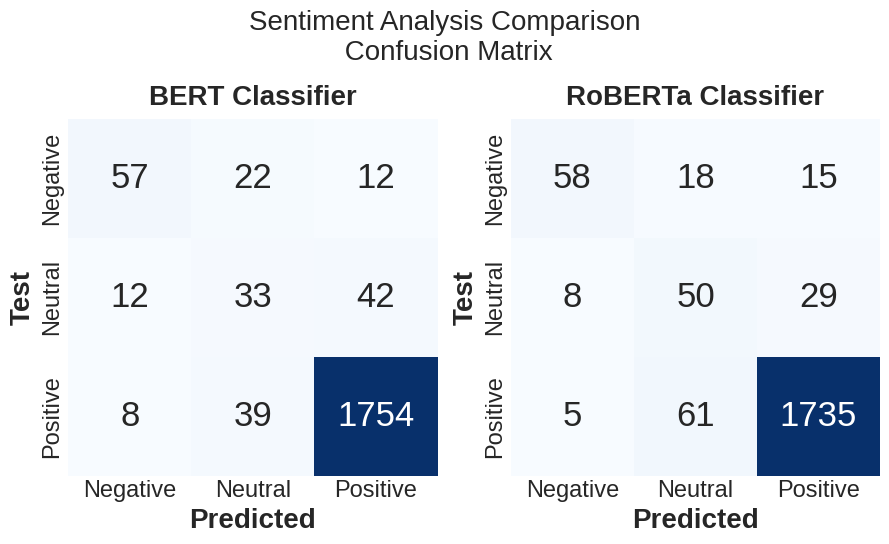

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(9,5.5))

labels = ['Negative', 'Neutral', 'Positive']
plt.suptitle('Sentiment Analysis Comparison\n Confusion Matrix', fontsize=20)


sns.heatmap(confusion_matrix(y_test.argmax(1),y_pred_bert.argmax(1)),
            annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[0], annot_kws={"size":25})

ax[0].set_title('BERT Classifier', fontsize=20)
ax[0].set_yticklabels(labels, fontsize=17);
ax[0].set_xticklabels(labels, fontsize=17);
ax[0].set_ylabel('Test', fontsize=20)
ax[0].set_xlabel('Predicted', fontsize=20)

sns.heatmap(confusion_matrix(y_test.argmax(1),y_pred_roberta.argmax(1)),
            annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[1], annot_kws={"size":25})
ax[1].set_title('RoBERTa Classifier', fontsize=20)
ax[1].set_yticklabels(labels, fontsize=17);
ax[1].set_xticklabels(labels, fontsize=17);
ax[1].set_ylabel('Test', fontsize=20)
ax[1].set_xlabel('Predicted', fontsize=20)


plt.show()

#CNN-BERT

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, concatenate, Input, GlobalAveragePooling1D
from tensorflow.keras.models import Model

In [ ]:
# Load datasets
test_data = pd.read_csv('forhybrid_test.csv')
train_data = pd.read_csv('forhybrid_train.csv')
combined_dataset = pd.concat([test_data, train_data], ignore_index=True)
combined_dataset.to_csv('combined_dataset.csv', index=False)

dataset = pd.read_csv('combined_dataset.csv')

# Preprocess the data
X = dataset['text_clean'].values
y = dataset['sentiment'].values

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Tokenize text data for CNN
max_words = 10000
max_sequence_length = 200
Ctokenizer = Tokenizer(num_words=max_words)
Ctokenizer.fit_on_texts(X_train)
X_train_cnn = Ctokenizer.texts_to_sequences(X_train)
X_test_cnn = Ctokenizer.texts_to_sequences(X_test)
X_train_cnn = pad_sequences(X_train_cnn, maxlen=max_sequence_length)
X_test_cnn = pad_sequences(X_test_cnn, maxlen=max_sequence_length)

In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer

# Loading BERT tokenizer and model
max_length = 200
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
BERT_model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenizing text data for BERT
X_train_bert = tokenizer_bert(list(X_train), padding=True, truncation=True, return_tensors='tf', max_length=max_length)
X_test_bert = tokenizer_bert(list(X_test), padding=True, truncation=True, return_tensors='tf', max_length=max_length)

# Converting input data to tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices(X_train_bert.input_ids)
test_dataset = tf.data.Dataset.from_tensor_slices(X_test_bert.input_ids)

# Defining a function to generate BERT embeddings for a batch of input IDs
def generate_bert_embeddings(input_ids_batch):
    embeddings = BERT_model(input_ids_batch)[0]
    return embeddings

# Maping the generate_bert_embeddings function over the datasets to generate embeddings
batch_size = 32  # Adjust as needed
train_embeddings_dataset = train_dataset.batch(batch_size)
test_embeddings_dataset = test_dataset.batch(batch_size)

# Generating embeddings by iterating through the dataset
X_train_bert_embeddings = []
for batch_input_ids in train_embeddings_dataset:
    batch_embeddings = generate_bert_embeddings(batch_input_ids)
    X_train_bert_embeddings.append(batch_embeddings)
X_test_bert_embeddings = []
for batch_input_ids in test_embeddings_dataset:
    batch_embeddings = generate_bert_embeddings(batch_input_ids)
    X_test_bert_embeddings.append(batch_embeddings)
# Concatenating embeddings to obtain the final embeddings
X_train_bert_embeddings = tf.concat(X_train_bert_embeddings, axis=0)
X_test_bert_embeddings = tf.concat(X_test_bert_embeddings, axis=0)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Create CNN model
CNN_input = Input(shape=(max_sequence_length,))
CNN_layer = Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length)(CNN_input)
CNN_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(CNN_layer)
CNN_layer = GlobalMaxPooling1D()(CNN_layer)
CNN_layer = Dense(128, activation='relu')(CNN_layer)
CNN_layer = Dropout(0.3)(CNN_layer)
CNN_output = Dense(len(label_encoder.classes_), activation='softmax')(CNN_layer)
CNN_model = Model(inputs=CNN_input, outputs=CNN_output)
CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Create BERT model
BERT_input = Input(shape=(max_length,768))  # Adjust the BERT embedding size accordingly
BERT_output = GlobalAveragePooling1D()(BERT_input)
BERT_output = Dense(len(label_encoder.classes_), activation='softmax')(BERT_output)
BERT_model = Model(inputs=BERT_input, outputs=BERT_output)
BERT_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Create Hybrid model
hybrid_cnn_input = Input(shape=(max_sequence_length,))
cnn_layer_hybrid = Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length)(hybrid_cnn_input)
cnn_layer_hybrid = Conv1D(filters=128, kernel_size=5, activation='relu')(cnn_layer_hybrid)
cnn_layer_hybrid = GlobalMaxPooling1D()(cnn_layer_hybrid)
cnn_layer_hybrid = Dense(128, activation='relu')(cnn_layer_hybrid)
cnn_layer_hybrid = Dropout(0.3)(cnn_layer_hybrid)
hybrid_bert_input = Input(shape=(max_length,768))  # Adjust the BERT embedding size accordingly
bert_output_hybrid = GlobalAveragePooling1D()(hybrid_bert_input)
concatenated = concatenate([cnn_layer_hybrid, bert_output_hybrid])
hybrid_CNN_BERT_output = Dense(len(label_encoder.classes_), activation='softmax')(concatenated)
hybrid_CNN_BERT_model = Model(inputs=[hybrid_cnn_input, hybrid_bert_input], outputs=hybrid_CNN_BERT_output)
hybrid_CNN_BERT_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hybrid_CNN_BERT_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 200, 100)             1000000   ['input_3[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 196, 128)             64128     ['embedding_1[0][0]']         
                                                                                                  
 global_max_pooling1d_1 (Gl  (None, 128)                  0         ['conv1d_1[0][0]']            
 obalMaxPooling1D)                                                                          

In [ ]:
# Fit the models

hybrid_CNN_BERT_model.fit([X_train_cnn, X_train_bert_embeddings], y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
138/138 [==============================] - 29s 155ms/step - loss: 0.3923 - accuracy: 0.9013 - val_loss: 0.3181 - val_accuracy: 0.9167
Epoch 2/5
138/138 [==============================] - 13s 93ms/step - loss: 0.2611 - accuracy: 0.9139 - val_loss: 0.2392 - val_accuracy: 0.9158
Epoch 3/5
138/138 [==============================] - 8s 62ms/step - loss: 0.1474 - accuracy: 0.9404 - val_loss: 0.2508 - val_accuracy: 0.9167
Epoch 4/5
138/138 [==============================] - 4s 31ms/step - loss: 0.0786 - accuracy: 0.9681 - val_loss: 0.3386 - val_accuracy: 0.9049
Epoch 5/5
138/138 [==============================] - 3s 24ms/step - loss: 0.0464 - accuracy: 0.9826 - val_loss: 0.4463 - val_accuracy: 0.9167


In [ ]:
CNN_BERT_y_pred = hybrid_CNN_BERT_model.predict([X_test_cnn, X_test_bert_embeddings])

44/44 [==============================] - 0s 6ms/step


In [ ]:
import numpy as np
CNN_BERT_y_pred = np.argmax(CNN_BERT_y_pred,axis=1)
CNN_BERT_y_pred

array([2, 2, 2, ..., 2, 2, 2])

44/44 [==============================] - 0s 6ms/step


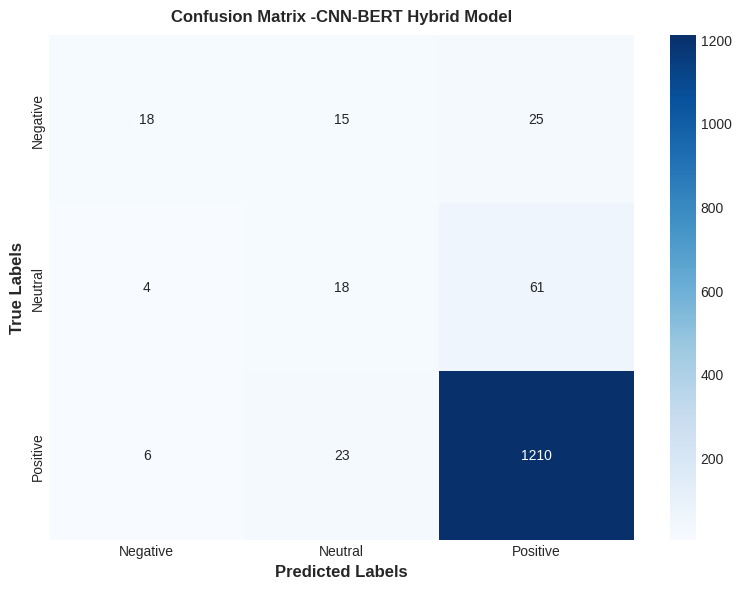

In [ ]:
# Evaluate Hybrid model
hybrid_predictions = hybrid_CNN_BERT_model.predict([X_test_cnn, X_test_bert_embeddings])
hybrid_predicted_labels = np.argmax(hybrid_predictions, axis=1)
hybrid_true_labels = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(hybrid_true_labels, hybrid_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix -CNN-BERT Hybrid Model')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate CNN-BERT model
cnn_predictions = CNN_model.predict(X_test_cnn)
cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)
cnn_true_labels = np.argmax(y_test, axis=1)

# Evaluate Hybrid model
hybrid_predictions = hybrid_CNN_BERT_model.predict([X_test_cnn, X_test_bert_embeddings])
hybrid_predicted_labels = np.argmax(hybrid_predictions, axis=1)

hybrid_report = classification_report(cnn_true_labels, hybrid_predicted_labels, target_names=label_encoder.classes_)
print("CNN-BERT Hybrid Model Classification Report:")
print(hybrid_report)

44/44 [==============================] - 0s 6ms/step
CNN-BERT Hybrid Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.64      0.31      0.42        58
     Neutral       0.32      0.22      0.26        83
    Positive       0.93      0.98      0.95      1239

    accuracy                           0.90      1380
   macro avg       0.63      0.50      0.54      1380
weighted avg       0.88      0.90      0.89      1380



In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate Hybrid model
hybrid_predictions = hybrid_CNN_BERT_model.predict([X_test_cnn, X_test_bert_embeddings])
hybrid_predicted_labels = np.argmax(hybrid_predictions, axis=1)
hybrid_true_labels = np.argmax(y_test, axis=1)

hybrid_accuracy = accuracy_score(hybrid_true_labels, hybrid_predicted_labels)
print("CNN-BERT Hybrid Model Overall Accuracy:", hybrid_accuracy)

44/44 [==============================] - 0s 6ms/step
CNN-BERT Hybrid Model Overall Accuracy: 0.9028985507246376


#CNN-RoBERTa

In [ ]:
import tensorflow as tf
from transformers import TFRobertaModel, RobertaTokenizer

# Load roBERTa tokenizer and model
max_length = 200
tokenizer_roberta = RobertaTokenizer.from_pretrained('roberta-base')
RoBERTa_model = TFRobertaModel.from_pretrained('roberta-base')

# Tokenize text data for roBERTa
X_train_roberta = tokenizer_roberta(list(X_train), padding=True, truncation=True, return_tensors='tf', max_length=max_length)
X_test_roberta = tokenizer_roberta(list(X_test), padding=True, truncation=True, return_tensors='tf', max_length=max_length)

# Convert input data to tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices(X_train_roberta.input_ids)
test_dataset = tf.data.Dataset.from_tensor_slices(X_test_roberta.input_ids)

# Define a function to generate roBERTa embeddings for a batch of input IDs
def generate_roberta_embeddings(input_ids_batch):
    embeddings = RoBERTa_model(input_ids_batch)[0]
    return embeddings

# Map the generate_roberta_embeddings function over the datasets to generate embeddings
batch_size = 32  # Adjust as needed
train_embeddings_dataset = train_dataset.batch(batch_size)
test_embeddings_dataset = test_dataset.batch(batch_size)
# Generate embeddings by iterating through the dataset
X_train_roberta_embeddings = []
for batch_input_ids in train_embeddings_dataset:
    batch_embeddings = generate_roberta_embeddings(batch_input_ids)
    X_train_roberta_embeddings.append(batch_embeddings)
X_test_roberta_embeddings = []
for batch_input_ids in test_embeddings_dataset:
    batch_embeddings = generate_roberta_embeddings(batch_input_ids)
    X_test_roberta_embeddings.append(batch_embeddings)
# Concatenate embeddings to obtain the final embeddings
X_train_roberta_embeddings = tf.concat(X_train_roberta_embeddings, axis=0)
X_test_roberta_embeddings = tf.concat(X_test_roberta_embeddings, axis=0)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [ ]:
# Create roBERTa model
RoBERTa_input = Input(shape=(max_length,768))  # Adjust the BERT embedding size accordingly
RoBERTa_output = GlobalAveragePooling1D()(RoBERTa_input)
RoBERTa_output = Dense(len(label_encoder.classes_), activation='softmax')(RoBERTa_output)
RoBERTa_model = Model(inputs=RoBERTa_input, outputs=RoBERTa_output)
RoBERTa_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Create  Hybrid model
hybrid_cnn_input = Input(shape=(max_sequence_length,))
cnn_layer_hybrid = Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length)(hybrid_cnn_input)
cnn_layer_hybrid = Conv1D(filters=128, kernel_size=5, activation='relu')(cnn_layer_hybrid)
cnn_layer_hybrid = GlobalMaxPooling1D()(cnn_layer_hybrid)
cnn_layer_hybrid = Dense(128, activation='relu')(cnn_layer_hybrid)
cnn_layer_hybrid = Dropout(0.3)(cnn_layer_hybrid)
hybrid_roberta_input = Input(shape=(max_length,768))  # Adjust the RoBERTa embedding size accordingly
roberta_output_hybrid = GlobalAveragePooling1D()(hybrid_roberta_input)
concatenated = concatenate([cnn_layer_hybrid, roberta_output_hybrid])
hybrid_CNN_RoBERTa_output = Dense(len(label_encoder.classes_), activation='softmax')(concatenated)
hybrid_CNN_RoBERTa_model = Model(inputs=[hybrid_cnn_input, hybrid_roberta_input], outputs = hybrid_CNN_RoBERTa_output)
hybrid_CNN_RoBERTa_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hybrid_CNN_RoBERTa_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 200, 100)             1000000   ['input_6[0][0]']             
                                                                                                  
 conv1d_2 (Conv1D)           (None, 196, 128)             64128     ['embedding_2[0][0]']         
                                                                                                  
 global_max_pooling1d_2 (Gl  (None, 128)                  0         ['conv1d_2[0][0]']            
 obalMaxPooling1D)                                                                          

In [ ]:
hybrid_CNN_RoBERTa_model.fit([X_train_cnn, X_train_roberta_embeddings], y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
138/138 [==============================] - 16s 107ms/step - loss: 0.3981 - accuracy: 0.8931 - val_loss: 0.3048 - val_accuracy: 0.9167
Epoch 2/5
138/138 [==============================] - 10s 71ms/step - loss: 0.2614 - accuracy: 0.9101 - val_loss: 0.2444 - val_accuracy: 0.9158
Epoch 3/5
138/138 [==============================] - 5s 38ms/step - loss: 0.1474 - accuracy: 0.9454 - val_loss: 0.2448 - val_accuracy: 0.9194
Epoch 4/5
138/138 [==============================] - 5s 39ms/step - loss: 0.0752 - accuracy: 0.9735 - val_loss: 0.3422 - val_accuracy: 0.9185
Epoch 5/5
138/138 [==============================] - 3s 22ms/step - loss: 0.0378 - accuracy: 0.9887 - val_loss: 0.4203 - val_accuracy: 0.9058


In [ ]:
CNN_RoBERTa_y_pred = hybrid_CNN_RoBERTa_model.predict([X_test_cnn, X_test_roberta_embeddings])

44/44 [==============================] - 0s 6ms/step


In [ ]:
import numpy as np
CNN_RoBERTa_y_pred = np.argmax(CNN_RoBERTa_y_pred,axis=1)
CNN_RoBERTa_y_pred

array([2, 2, 2, ..., 2, 2, 2])

44/44 [==============================] - 0s 6ms/step


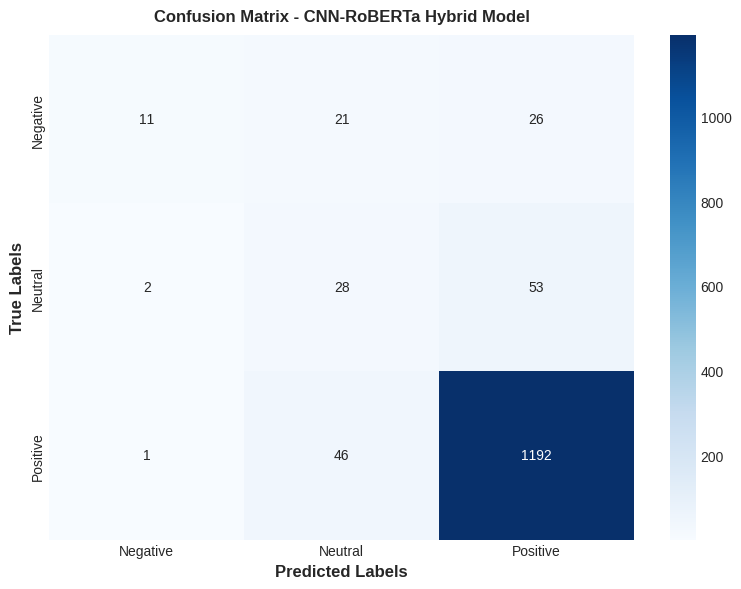

In [ ]:
# Evaluate Hybrid model
hybrid_predictions = hybrid_CNN_RoBERTa_model.predict([X_test_cnn, X_test_roberta_embeddings])
hybrid_predicted_labels = np.argmax(hybrid_predictions, axis=1)
hybrid_true_labels = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(hybrid_true_labels, hybrid_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - CNN-RoBERTa Hybrid Model')
plt.show()

In [ ]:
# Evaluate CNN-RoBERTa model
cnn_predictions = CNN_model.predict(X_test_cnn)
cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)
cnn_true_labels = np.argmax(y_test, axis=1)

hybrid_predictions = hybrid_CNN_RoBERTa_model.predict([X_test_cnn, X_test_bert_embeddings])
hybrid_predicted_labels = np.argmax(hybrid_predictions, axis=1)

hybrid_report = classification_report(cnn_true_labels, hybrid_predicted_labels, target_names=label_encoder.classes_)
print("CNN-RoBERTa Hybrid Model Classification Report:")
print(hybrid_report)

44/44 [==============================] - 0s 6ms/step
CNN-RoBERTa Hybrid Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.28      0.42        58
     Neutral       0.31      0.29      0.30        83
    Positive       0.94      0.97      0.95      1239

    accuracy                           0.90      1380
   macro avg       0.70      0.51      0.56      1380
weighted avg       0.89      0.90      0.89      1380



In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate Hybrid model
hybrid_predictions = hybrid_CNN_RoBERTa_model.predict([X_test_cnn, X_test_roberta_embeddings])
hybrid_predicted_labels = np.argmax(hybrid_predictions, axis=1)
hybrid_true_labels = np.argmax(y_test, axis=1)

hybrid_accuracy = accuracy_score(hybrid_true_labels, hybrid_predicted_labels)
print("CNN-RoBERTa Hybrid Model Overall Accuracy:", hybrid_accuracy)

44/44 [==============================] - 0s 6ms/step
CNN-RoBERTa Hybrid Model Overall Accuracy: 0.8920289855072464


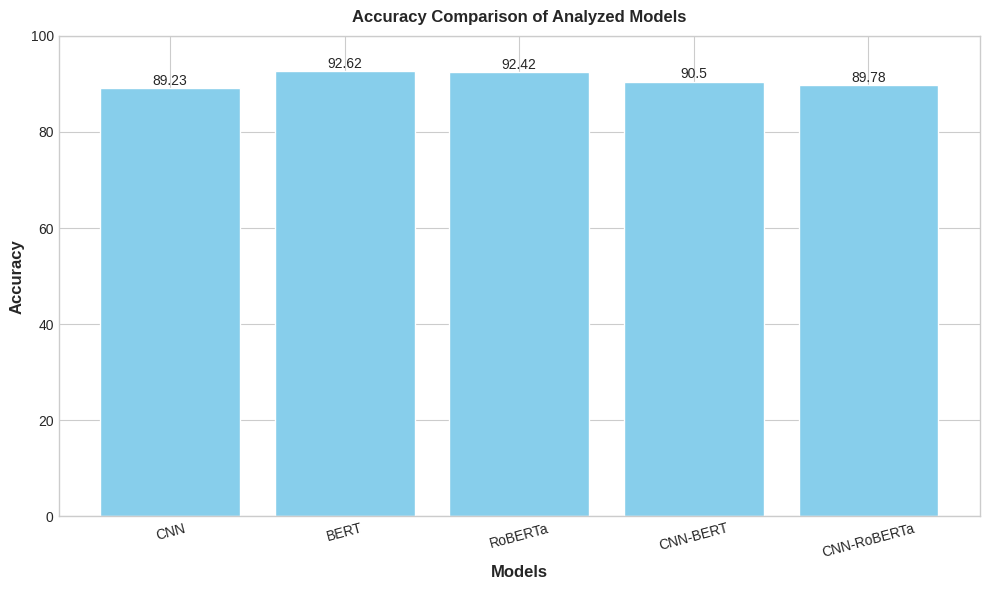

In [ ]:
import matplotlib.pyplot as plt

# List of model names
model_names = ["CNN", "BERT", "RoBERTa", "CNN-BERT", "CNN-RoBERTa"]

# List of accuracy values for each model (replace with your actual values)
accuracy_values = [89.23, 92.62, 92.42, 90.50 , 89.78]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Analyzed Models')
plt.ylim(0, 100)  # Set the y-axis range if needed
plt.xticks(rotation=15)  # Rotate the model names for better readability

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()